In [1]:
from sklearn.datasets import load_wine

wine_data = load_wine() 

In [2]:
type(wine_data['data'])

numpy.ndarray

In [3]:
wine_data['data'].shape

(178, 13)

In [4]:
len(wine_data.feature_names)

13

In [5]:
print(wine_data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [6]:
import pandas as pd


# Convert data to pandas dataframe
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

# Add the target label
wine_df["target"] = wine_data.target

# Take a preview
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [7]:
wine_df.describe() 

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [8]:
# Missing values,
# Redundant values
# Outliers
# Errors
# Noise

In [9]:
from sklearn.preprocessing import StandardScaler

# Split data into features and label 
X = wine_df[wine_data.feature_names].copy()
y = wine_df["target"].copy() 

# Instantiate scaler and fit on features
scaler = StandardScaler()
scaler.fit(X)

# Transform features
X_scaled = scaler.transform(X.values)  ## use X is same as use X.values

/home/bguo/miniconda3/envs/cuda121/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [10]:
X_scaled[0]

array([ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
        0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
        0.36217728,  1.84791957,  1.01300893])

In [11]:
from sklearn.model_selection import train_test_split

# Split data into train and test
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled,
                                                                  y,
                                                             train_size=.7,
                                                           random_state=25)

# Check the splits are correct
print(f"Train size: {round(len(X_train_scaled) / len(X) * 100)}% \n\
Test size: {round(len(X_test_scaled) / len(X) * 100)}%")

Train size: 70% 
Test size: 30%


## LogisticRegression vs SVC vs DecisionTreeClassifier

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Instnatiating the models 
logistic_regression = LogisticRegression()
svm = SVC()
tree = DecisionTreeClassifier()

# Training the models 
logistic_regression.fit(X_train_scaled, y_train)
svm.fit(X_train_scaled, y_train)
tree.fit(X_train_scaled, y_train)

# Making predictions with each model
log_reg_preds = logistic_regression.predict(X_test_scaled)
svm_preds = svm.predict(X_test_scaled)
tree_preds = tree.predict(X_test_scaled)

[Text(0.5, 0.9, 'x[12] <= 0.026\ngini = 0.663\nsamples = 124\nvalue = [42, 46, 36]'),
 Text(0.25, 0.7, 'x[6] <= -0.632\ngini = 0.504\nsamples = 77\nvalue = [1, 43, 33]'),
 Text(0.125, 0.5, 'x[9] <= -0.577\ngini = 0.234\nsamples = 37\nvalue = [0, 5, 32]'),
 Text(0.0625, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(0.1875, 0.3, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 32]'),
 Text(0.375, 0.5, 'x[4] <= 0.931\ngini = 0.096\nsamples = 40\nvalue = [1, 38, 1]'),
 Text(0.3125, 0.3, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(0.4375, 0.3, 'x[11] <= -0.702\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(0.375, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.75, 0.7, 'x[6] <= 0.136\ngini = 0.231\nsamples = 47\nvalue = [41, 3, 3]'),
 Text(0.625, 0.5, 'x[8] <= -0.063\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.5625, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.6875, 0

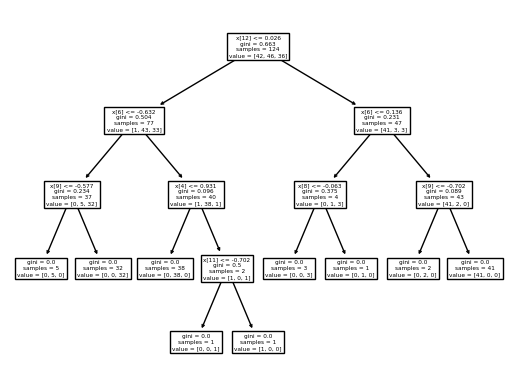

In [13]:
plot_tree(tree)

In [14]:
from sklearn.metrics import classification_report

# Store model predictions in a dictionary
# this makes it's easier to iterate through each model
# and print the results. 
model_preds = {
    "Logistic Regression": log_reg_preds,
    "Support Vector Machine": svm_preds,
    "Decision Tree": tree_preds
}

for model, preds in model_preds.items():
    print(f"{model} Results:\n{classification_report(y_test, preds)}", sep="\n\n")

Logistic Regression Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.92      0.96        25
           2       0.86      1.00      0.92        12

    accuracy                           0.96        54
   macro avg       0.95      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

Support Vector Machine Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        12

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Decision Tree Results:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.96      0.88      0.92  

## new example with KneighborsClassifer

In [15]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [16]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [17]:
print(iris.data.shape)

(150, 4)


In [18]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.30)

In [20]:
X_train.shape

(105, 4)

In [21]:

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Range_k = range(1,15)
scores = {}
scores_list = []
for k in Range_k:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(X_train, y_train)
   y_pred = classifier.predict(X_test)
   scores[k] = accuracy_score(y_test,y_pred)
   scores_list.append(accuracy_score(y_test,y_pred))
   result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)


Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  2 15]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      1.00      0.93        14
           2       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



### in sklearn confusion matrix, eacho row is true, each column is prediction


In [49]:
print(len( [x  for x in y_test if x==1]))
print(len( [x  for x in y_pred if x==1]))

14
16


Text(0, 0.5, 'Accuracy')

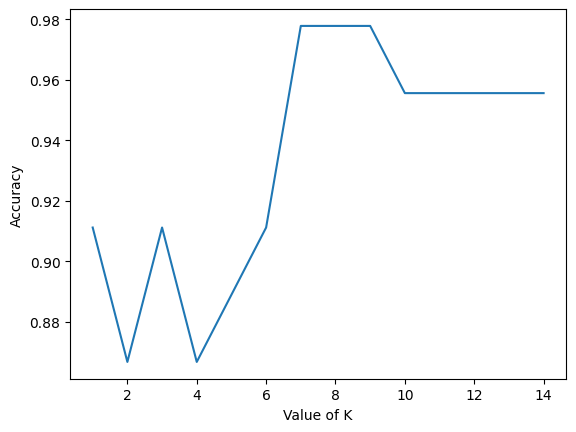

In [23]:
import matplotlib.pyplot as plt
plt.plot(Range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

In [25]:
print(classifier)

KNeighborsClassifier(n_neighbors=14)


## a full tuned KNN

In [26]:
rnc = KNeighborsClassifier(
   algorithm = 'auto', leaf_size = 30, metric = 'minkowski',
   metric_params = None, n_jobs = None, n_neighbors = 8, p = 2,
   weights = 'uniform'
)

In [27]:
rnc.fit(X_train, y_train)
y_test_predict=rnc.predict(X_test)

In [29]:
res=classification_report(y_test, y_test_predict)

In [30]:
print(res)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [34]:
y_test

array([2, 2, 0, 1, 2, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 1, 0,
       1, 2, 1, 0, 1, 0, 0, 0, 2, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1,
       2])

## precision_score and recall_score

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(y_test, y_test_predict)
### since it's not binary, you have to specify lables and change average to non binary options
precision = precision_score(y_test, y_test_predict, labels=[0,1], average="micro")
print(precision)
# recall = recall_score(y_test, y_test_predict)

0.9655172413793104
